<a href="https://colab.research.google.com/github/vidya08/DSCI-632-Final-Project/blob/main/632_project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Employee Retention Using Machine Learning Models

### 0 Imports/Installation

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null 
!wget https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz 
!tar xvf spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark==3.0.3
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.0.3-bin-hadoop2.7"
from pyspark.sql import SparkSession
spark= SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate() 
data = [1,2,3,4,5,6,7,8,9,10,11,12]
rdd_sample = spark.sparkContext.parallelize(data, 2)
rdd_sample.take(5)

--2022-03-06 14:51:54--  https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220400553 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.3-bin-hadoop2.7.tgz’

spark-3.0.3-bin-had 100%[===================>] 210.19M   204MB/s    in 1.0s    

2022-03-06 14:52:05 (204 MB/s) - ‘spark-3.0.3-bin-hadoop2.7.tgz’ saved [220400553/220400553]

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/s

[1, 2, 3, 4, 5]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Project').getOrCreate()
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler, OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() 

In [128]:
#random seed for notebook reproducability
seed = 42

##Creating Sparksession


In [ ]:
#spark = SparkSession.builder.master("local[2]").appName("632-Project-EmployeeAtt").getOrCreate()

In [ ]:
#spark

In [ ]:
#sc = spark.sparkContext
#sc

<SparkContext master=local[1] appName=SparkByExamples.com>

In [ ]:
#sqlContext = SQLContext(spark.sparkContext)
#sqlContext

##Loading Data from a File

In [ ]:
EmpAttr = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').load('Employee-Attrition.csv')

In [ ]:
EmpAttr.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [ ]:
#Nummber of records in dataset
EmpAttr.count()

1470

In [ ]:
#Schema of input dataset
EmpAttr.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

##Visualize the data 

In [ ]:
#Data types of input dataset
EmpAttr.dtypes

[('Age', 'int'),
 ('Attrition', 'string'),
 ('BusinessTravel', 'string'),
 ('DailyRate', 'int'),
 ('Department', 'string'),
 ('DistanceFromHome', 'int'),
 ('Education', 'int'),
 ('EducationField', 'string'),
 ('EmployeeCount', 'int'),
 ('EmployeeNumber', 'int'),
 ('EnvironmentSatisfaction', 'int'),
 ('Gender', 'string'),
 ('HourlyRate', 'int'),
 ('JobInvolvement', 'int'),
 ('JobLevel', 'int'),
 ('JobRole', 'string'),
 ('JobSatisfaction', 'int'),
 ('MaritalStatus', 'string'),
 ('MonthlyIncome', 'int'),
 ('MonthlyRate', 'int'),
 ('NumCompaniesWorked', 'int'),
 ('Over18', 'string'),
 ('OverTime', 'string'),
 ('PercentSalaryHike', 'int'),
 ('PerformanceRating', 'int'),
 ('RelationshipSatisfaction', 'int'),
 ('StandardHours', 'int'),
 ('StockOptionLevel', 'int'),
 ('TotalWorkingYears', 'int'),
 ('TrainingTimesLastYear', 'int'),
 ('WorkLifeBalance', 'int'),
 ('YearsAtCompany', 'int'),
 ('YearsInCurrentRole', 'int'),
 ('YearsSinceLastPromotion', 'int'),
 ('YearsWithCurrManager', 'int')]

Text(0, 0.5, '# of Employees')

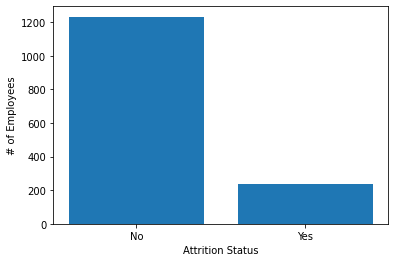

In [ ]:
#Bar plot showing number of employees who remain vs. left in the dataset
attr_cnt = EmpAttr.groupby('Attrition').count().toPandas()
index = ['No', 'Yes']
x = attr_cnt['Attrition'].tolist()
y = attr_cnt['count'].tolist()
plt.bar(x, y)
plt.xticks(x, labels=index)
plt.xlabel("Attrition Status")
plt.ylabel("# of Employees")
plt.show()

<Figure size 1080x1080 with 0 Axes>

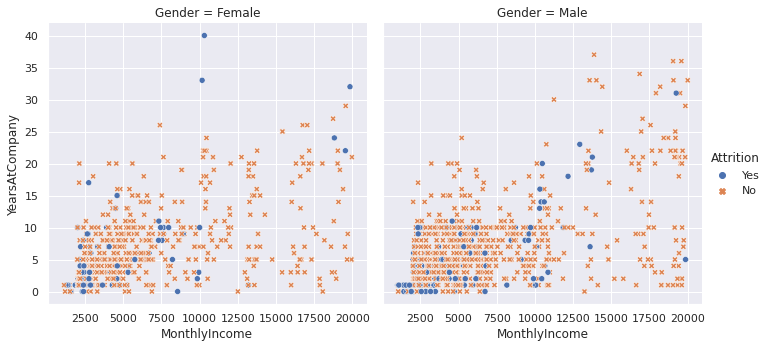

In [ ]:
#Scatterplot of MonthlyIncome vs. YearsAtCompany colored by Attrition
#and split by Gender
EmpAttr_df = EmpAttr.toPandas()
plt.figure(figsize=(15,15))
sns.relplot(
    data=EmpAttr_df, x="MonthlyIncome", y="YearsAtCompany",
    col="Gender", hue="Attrition", style="Attrition",
    kind="scatter"
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc32c521890>,
      dtype=object)

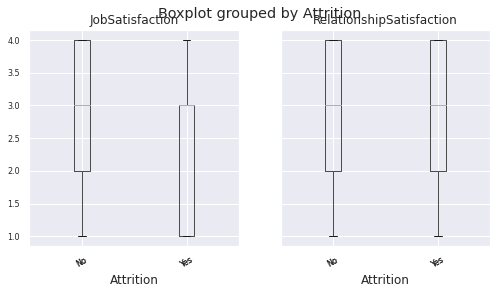

In [159]:
EmpAttr_df.boxplot(column=['JobSatisfaction', 'RelationshipSatisfaction'], by='Attrition', grid='true', fontsize=8, rot=30)

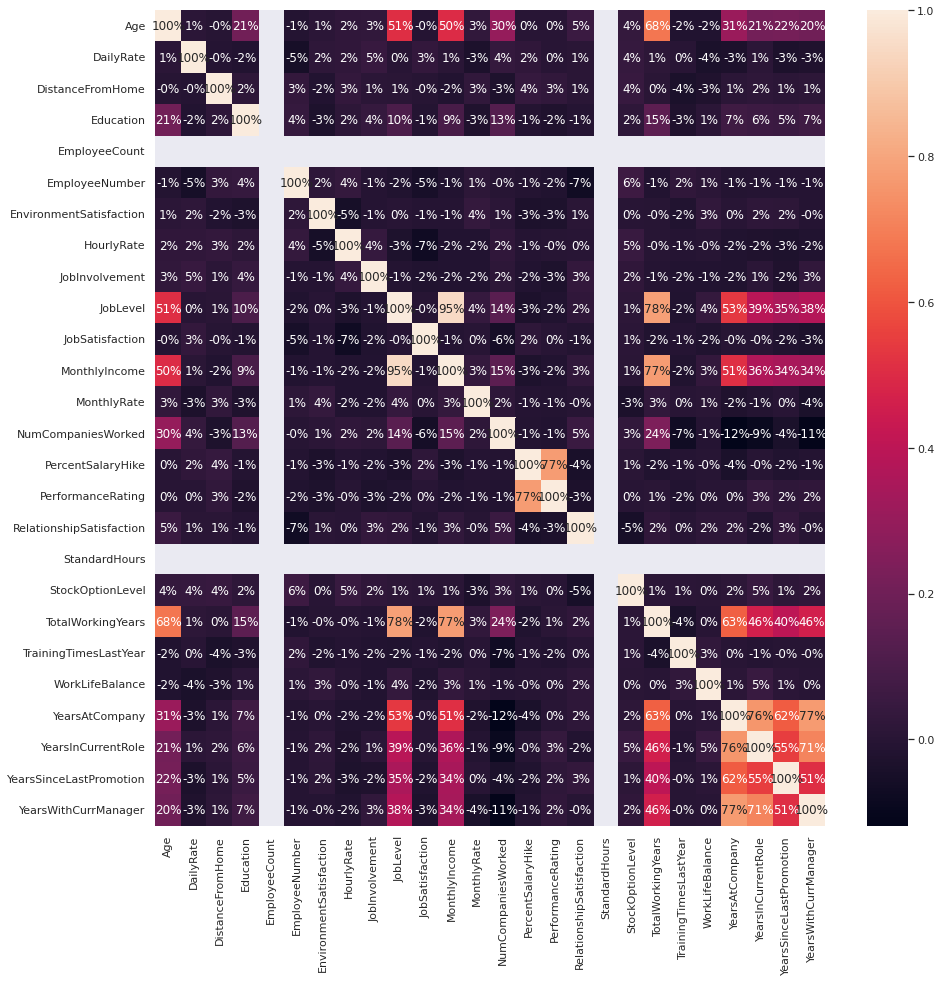

In [160]:
##  correlation heatmap
plt.figure(figsize=(15,15)) 
sns.heatmap(EmpAttr_df.corr(), annot=True, fmt='.0%')

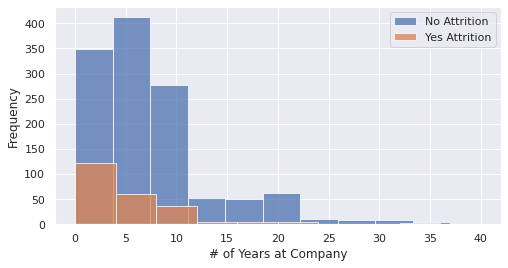

In [ ]:
EmpAttr_df[EmpAttr_df['Attrition']=='No']['YearsAtCompany'].plot.hist(alpha=0.75, label='No Attrition')
EmpAttr_df[EmpAttr_df['Attrition']=='Yes']['YearsAtCompany'].plot.hist(alpha=0.75, label='Yes Attrition')
plt.xlabel("# of Years at Company")
plt.legend()

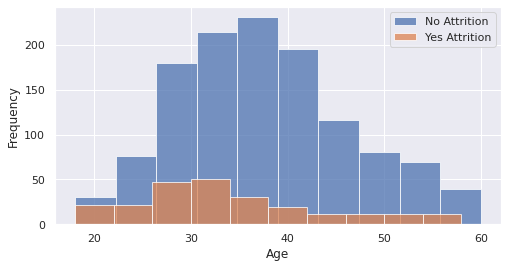

In [ ]:
EmpAttr_df[EmpAttr_df['Attrition']=='No']['Age'].plot.hist(alpha=0.75, label='No Attrition')
EmpAttr_df[EmpAttr_df['Attrition']=='Yes']['Age'].plot.hist(alpha=0.75, label='Yes Attrition')
plt.xlabel("Age")
plt.legend()

#Processing Data

In [ ]:
EmpAttr.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [ ]:
# Drop columns that contain no information, i.e. - all values are the same
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
EmpAttr = EmpAttr.drop(*columns_to_drop)

In [ ]:
# Transform Attrition from categorical to numerical label.
string_index = StringIndexer(inputCol='Attrition', outputCol='Attrition_index').fit(EmpAttr)

df_with_label_encoder = string_index.transform(EmpAttr)

In [ ]:
# convert all strings to integers
cols = ["BusinessTravel", "Department",'EducationField','Gender', 'JobRole', 'MaritalStatus', 'OverTime']
stages = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df_with_label_encoder) for column in cols]
#stages.append(OneHotEncoder(inputCols=["Agency_Type_index"], outputCols=["Agency_Type_num"]))

In [ ]:
# Append the rest labeled columns into 'feature' vector.
feature_cols = ['BusinessTravel_index', 'Department_index', 'EducationField_index', 'Gender_index','JobRole_index','MaritalStatus_index', 'OverTime_index']
stages.append(VectorAssembler(inputCols=feature_cols, outputCol='features'))

pipeline = Pipeline(stages=stages)
df_transformed = pipeline.fit(df_with_label_encoder).transform(df_with_label_encoder)

df_transformed.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------------+--------------------+----------------+--------------------+------------+-------------+-------------------+--------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|Relation

In [122]:
# Assemble all features
df_ml = df_transformed.select('Attrition_index', 'Age', 'DailyRate', 'DistanceFromhome', 'Education','EnvironmentSatisfaction','HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'features')
df_ml = df_ml.withColumnRenamed('Attrition_index', 'label')

featurizedData=df_ml.select('features','label' )
featurizedData.show(5, truncate = False)

In [129]:
# Perform train-test split
trainDF, testDF = featurizedData.randomSplit([0.8,0.2], seed)

print('Train dataset: ', trainDF.count(), ", percentage of train dataset: ", "{:.0%}".format(trainDF.count()/featurizedData.count()))
print('Test dataset: ', testDF.count(), ", percentage of test dataset: ", "{:.0%}".format(testDF.count()/featurizedData.count()))

Train dataset:  1216 , percentage of train dataset:  83%
Test dataset:  254 , percentage of test dataset:  17%


In [127]:
# Perform cross-validation to find best LR model
lr = LogisticRegression(maxIter = 10)

paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, np.linspace(0.3, 0.01, 10)) \
    .addGrid(lr.elasticNetParam, np.linspace(0.3, 0.8, 6)) \
    .build()
crossval_lr = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid_lr,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds= 5,
                          seed=seed)  
cvModel_lr = crossval_lr.fit(trainDF)
best_model_lr = cvModel_lr.bestModel.summary

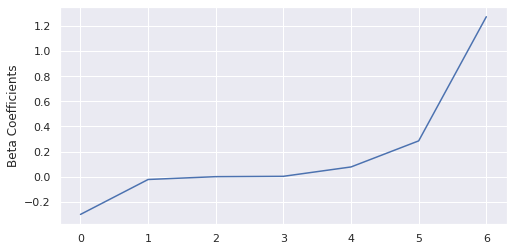

In [130]:
# Visualize coefficients of best LR model
beta = np.sort(cvModel_lr.bestModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [131]:
# Train Accuracy
my_mc_lr = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='accuracy')
print(f"Training set accuracy - LR: {my_mc_lr.evaluate(best_model_lr.predictions)}")

Training set accuracy - LR: 0.8429276315789473


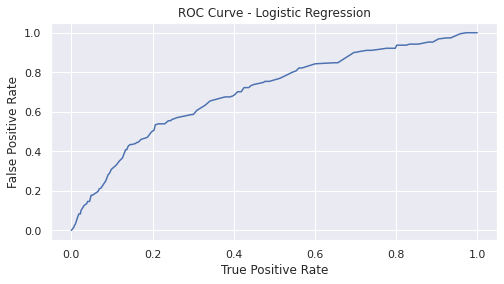

Training set areaUnderROC: 0.7027838079427915


In [132]:
#trainingSummary = lrModel.summary
roc = best_model_lr.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()
print(f"Training set areaUnderROC: {best_model_lr.areaUnderROC}")

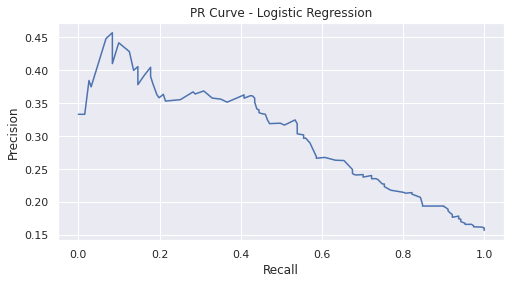

In [133]:
pr = best_model_lr.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR Curve - Logistic Regression')
plt.show()

In [134]:
## Make predictions on test dataset
predictions_lr = cvModel_lr.transform(testDF)

In [135]:
# Report metrics on test set predictions
# Test areaUnderROC
evaluator = BinaryClassificationEvaluator()
print(f"Test set areaUnderROC: {evaluator.evaluate(predictions_lr)}")
# Test Accuracy
my_mc_lr = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='accuracy')
print(f"Test set accuracy: {my_mc_lr.evaluate(predictions_lr)}")
# Test F1-score
my_mc_lr = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='f1')
print(f"Test set F1-score: {my_mc_lr.evaluate(predictions_lr)}")

Test set areaUnderROC: 0.6487249163879603
Test set accuracy: 0.8188976377952756
Test set F1-score: 0.7373623751576507


In [136]:
# Generate confusion matrix on test set predictions
preds_and_labels = predictions_lr.select(['prediction','label']).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','label'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())


[[208.   0.]
 [ 46.   0.]]


Random Forest

In [137]:
# Perform cross-validation to train and fit best Random Forest model
rf = RandomForestClassifier(labelCol="label", featuresCol="features")  

paramGrid_rf = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [2, 5, 10]) \
    .addGrid(rf.maxBins, [10, 20, 40]) \
    .addGrid(rf.numTrees, [3, 20]) \
    .build()

crossval_rf = CrossValidator(
    estimator=rf,
    estimatorParamMaps=paramGrid_rf,
    evaluator=BinaryClassificationEvaluator(),
    numFolds=5,
    seed=seed)

cvModel_rf = crossval_rf.fit(trainDF)
best_model_rf = cvModel_rf.bestModel

In [138]:
# Make predictions on test set
predictions_rf = best_model_rf.transform(testDF)

In [139]:
# Report metrics on test set predictions
# Test areaUnderROC
evaluator = BinaryClassificationEvaluator()
print(f"Test set areaUnderROC: {evaluator.evaluate(predictions_rf)}")
# Test Accuracy
my_mc_lr = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='accuracy')
print(f"Test set accuracy: {my_mc_lr.evaluate(predictions_rf)}")
# Test F1-score
my_mc_lr = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='f1')
print(f"Test set F1-score: {my_mc_lr.evaluate(predictions_rf)}")

Test set areaUnderROC: 0.7452445652173914
Test set accuracy: 0.8267716535433071
Test set F1-score: 0.7556601620449618


In [140]:
# Generate confusion matrix on test set predictions
preds_and_labels = predictions_rf.select(['prediction','label']).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','label'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

[[208.   0.]
 [ 44.   2.]]


In [141]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [142]:
ExtractFeatureImp(best_model_rf.featureImportances, testDF, "features").head(10)

,vals,idx,name,score
6,"[No, Yes]",6,OverTime_index,0.365074
4,"[Sales Executive, Research Scientist, Laborato...",4,JobRole_index,0.242256
5,"[Married, Single, Divorced]",5,MaritalStatus_index,0.179872
2,"[Life Sciences, Medical, Marketing, Technical ...",2,EducationField_index,0.099625
0,"[Travel_Rarely, Travel_Frequently, Non-Travel]",0,BusinessTravel_index,0.053358
1,"[Research & Development, Sales, Human Resources]",1,Department_index,0.034484
3,"[Male, Female]",3,Gender_index,0.025330
